In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session
%matplotlib inline

# fix slow autocomplete
%config Completer.use_jedi = False

In [5]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # OS X 
    data_root = "/Volumes/Brain2019/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn1' in platstring):
    # then on AWS
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2019/"

manifest_path = os.path.join(data_root, "dynamic-brain-workshop/visual_coding_neuropixels/2019/manifest.json")

In [6]:
cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_sessions()

In [7]:
hcareas = ['CA','DG']

hc_sessions = []
for i in np.arange(len(sessions.structure_acronyms)):
    sessionid = sessions.structure_acronyms.index[i]
    if any(elem in sessions.structure_acronyms[sessionid] for elem in hcareas):
        hc_sessions.append(sessionid)
        
# for i, sesh in enumerate(hc_sessions):
#     print(sessions.structure_acronyms[sesh])

In [111]:
sesh_id = hc_sessions[0]
session = cache.get_session_data(sesh_id)
seshunits = session.units
CA_units = seshunits[seshunits['structure_acronym'] == 'CA']
DG_units = seshunits[seshunits['structure_acronym'] == 'DG']

In [112]:
# plt.hist(CA_units.snr, bins=30)
# plt.title('SNR')

In [113]:
# plt.hist(CA_units.isi_violations, bins=30)
# plt.title('ISI violations')

In [114]:
good_units_ca = CA_units[(CA_units.snr>1)&(CA_units.isi_violations<0.5)]
good_units_dg = DG_units[(DG_units.snr>1)&(DG_units.isi_violations<0.5)]

In [115]:
len(good_units_ca), len(good_units_dg)

(105, 37)

In [116]:
#combine all these unit ID's into array or something iterable
#for each unit, pull it's spike duration (less than say 0.3 ms should classify FS or RSU)

good_units_ca.head()

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,...,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,probe_description,location,sampling_rate,lfp_sampling_rate
unit_id,,,,,,,,,,,,,,,,,,,,,
914613460,0.829699,68.628105,0.020674,49,359.50,NaN,2.454910,0.026815,NaN,NaN,...,153,CA,375.0,11,757988387,1540,probeA,,29999.970319,2499.997527
914613476,0.335210,74.724000,0.015504,57,269.61,4.358002,4.017321,0.155206,72.934576,0.008623,...,165,CA,375.0,11,757988387,1660,probeA,,29999.970319,2499.997527
914613484,0.208296,83.203575,0.036066,62,156.87,2.685516,3.639626,0.426978,56.535303,0.019735,...,169,CA,375.0,11,757988387,1700,probeA,,29999.970319,2499.997527
914613486,0.189727,74.821890,0.005132,63,258.82,3.201774,2.995583,0.166583,55.240518,0.007849,...,169,CA,375.0,11,757988387,1700,probeA,,29999.970319,2499.997527
914613706,0.327822,182.028015,0.000313,173,94.44,6.127621,1.122522,0.160314,55.294272,0.002212,...,173,CA,375.0,11,757988387,1740,probeA,,29999.970319,2499.997527


In [117]:
good_units_ca.columns

Index(['PT_ratio', 'amplitude', 'amplitude_cutoff', 'cluster_id',
       'cumulative_drift', 'd_prime', 'firing_rate', 'isi_violations',
       'isolation_distance', 'l_ratio', 'local_index_unit', 'max_drift',
       'nn_hit_rate', 'nn_miss_rate', 'peak_channel_id', 'presence_ratio',
       'recovery_slope', 'repolarization_slope', 'silhouette_score', 'snr',
       'spread', 'velocity_above', 'velocity_below', 'waveform_duration',
       'waveform_halfwidth', 'channel_local_index', 'structure_acronym',
       'structure_id', 'probe_horizontal_position', 'probe_id',
       'probe_vertical_position', 'probe_description', 'location',
       'sampling_rate', 'lfp_sampling_rate'],
      dtype='object')

Text(0.5, 1.0, 'Waveform Duration')

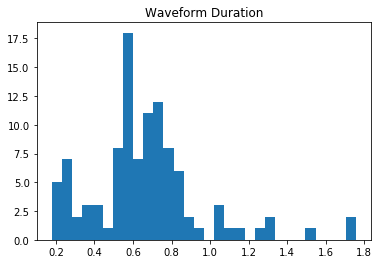

In [118]:
plt.hist(good_units_ca.waveform_duration,bins=30)
plt.title('Waveform Duration')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Recovery slope')

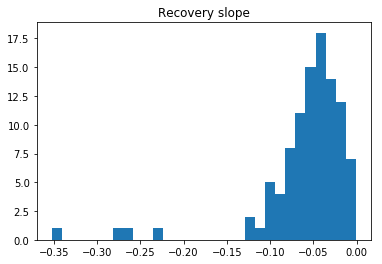

In [119]:
plt.hist(good_units_ca.recovery_slope,bins=30)
plt.title('Recovery slope')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Waveform_halfwidth')

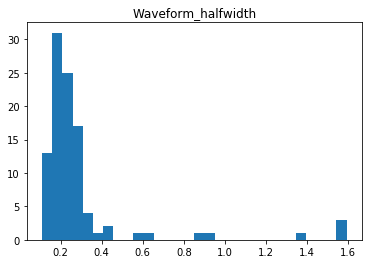

In [120]:
plt.hist(good_units_ca.waveform_halfwidth,bins=30)
plt.title('Waveform_halfwidth')